In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import flow

<h1> 2015 USGS Water Data </h1>
    
The majority of water use estimates are from the 2015 USGS report documenting water use in the US, which provide water values at the county-level for a number of variables [1]. 

In [2]:
df = flow.prep_water_use_2015()

To see the full list of variables in the 2015 USGS dataset that are used in this analysis, run the cell below:

In [3]:
for variables in df.columns:
    print(variables)

FIPS
STATE
COUNTY
PS-WGWFr
PS-WSWFr
PS-WGWSa
PS-WSWSa
DO-PSDel
PS-Wtotl
DO-WGWFr
DO-WSWFr
PT-WGWFr
PT-WGWSa
PT-WSWFr
PT-WSWSa
PT-RecWW
PT-PSDel
PT-CUTot
IN-WGWFr
IN-WSWFr
IN-WGWSa
IN-WSWSa
MI-WGWFr
MI-WSWFr
MI-WGWSa
MI-WSWSa
IR-WGWFr
IR-WSWFr
IR-CUsFr


To see a barchart of any of the variables, fill in the code below:

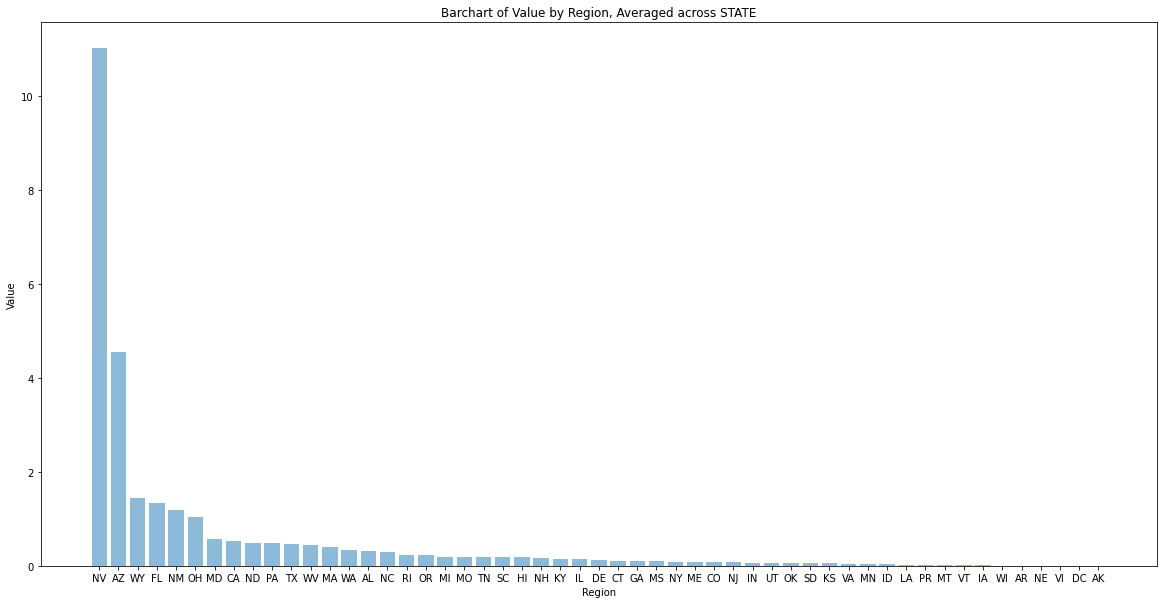

In [5]:
flow.plot_bar(df, "STATE","MI-WGWFr", "STATE")

# Intensities & Percentages

#### Conveyance Losses as a Percent of Water Withdrawn for Irrigation
Conveyance loss fraction for irrigation is calculated from the USGS 1995 water use dataset. It is calculated as the total conveyance losses (MGD) divided by the total water withdrawn (MGD) for irrigation. Looking at the fractions at the county level shows that a small subset of counties have unreliable values where conveyance losses are far greater than the amount withdrawn for irrigation. As a result, the ability to cap the loss fraction at a specified amount it provided and replace it with the average of the specified region. The default loss cap fraction is .90.

In [3]:
help(flow.calc_conveyance_loss_frac)

Help on function calc_conveyance_loss_frac in module flow.calculate:

calc_conveyance_loss_frac(df, loss_cap=True, loss_cap_amt=0.9, all_variables=False, regions=['State']) -> pandas.core.frame.DataFrame
    This function calculates the fraction of water lost during conveyance for irrigation for each row in the provided
    dataframe. The fraction is calculated as water lost in conveyance of irrigation water divided by total water
    withdrawn for irrigation.
    
    :param loss_cap:                       If True, a cap is placed on the conveyance loss fraction output
                                            and the regional average is substituted.
    :type loss_cap:                        bool
    
    :param loss_cap_amt:                   The amount at which irrigation losses are capped and values beyond are
                                            replaced by the specified cap amount.
    :type loss_cap_amt:                    float
    
    :param all_variables:          

In [6]:
df = flow.prep_water_use_1995()
df = flow.calc_conveyance_loss_frac(df, regions = ["State", "CountyName"])

In [7]:
df.head()

,State,CountyName,IR_CLoss_Frac
0,AL,Autauga,0.0
1,AL,Baldwin,0.0
2,AL,Barbour,0.0
3,AL,Bibb,0.0
4,AL,Blount,0.0


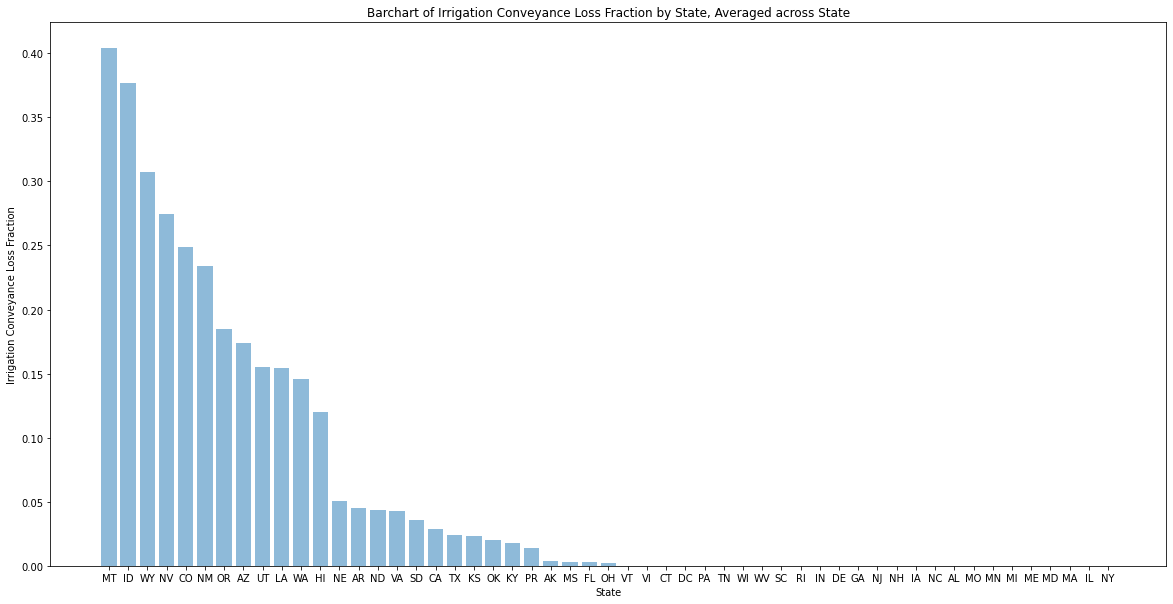

In [8]:
flow.plot_bar(df, "State","IR_CLoss_Frac", "State", y_axis_title = "Irrigation Conveyance Loss Fraction", x_axis_title="State")

In [11]:
df = flow.calc_hydroelectric_water_intensity(intensity_cap=True, region_avg=False)

df.head()

,State,CountyName,FIPS,HY_IF
0,AL,Autauga,01001,31.055819
1,AL,Baldwin,01003,NaN
2,AL,Barbour,01005,NaN
3,AL,Bibb,01007,NaN
4,AL,Blount,01009,NaN


In [ ]:
flow.plot_bar(df, "State","HY_IF", "State")